# Problem 1

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

Artificial Neural Network:
    
    it helps us the model the relationship between input and output with the help of artificial neural network.
    
    
    neural network is nothing but simply a network of interconnected cells called neurons and we can connect them. after connecting them we can use them for making predictions,c classifications.

In [74]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Generating reproducible results from same code
tf.random.set_seed(14) 

In [76]:
raw = pd.read_csv("gas_turbines.csv")
raw.head() 
#TEY is the variable we should predict.

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [77]:
df = raw.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [79]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


# Feature Analysis

All features in the dataset can be used in model building. This is a Regression Problem.

# Train | Split dataset

In [82]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

A common mistake when configuring a neural network is to first normalize the data before splitting the data

In [83]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [85]:
len(xtrain_scale)

10527

# Neural Network Modelling
# Building the Model

In [86]:
# Create your first MLP in Keras
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [87]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth

Epoch 1/100
48/48 [==============================] - 2s 12ms/step - loss: 0.0722 - mse: 0.0722 - mae: 0.2038 - val_loss: 0.0475 - val_mse: 0.0475 - val_mae: 0.1610
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0449 - mse: 0.0449 - mae: 0.1504 - val_loss: 0.0460 - val_mse: 0.0460 - val_mae: 0.1527
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0435 - mse: 0.0435 - mae: 0.1489 - val_loss: 0.0450 - val_mse: 0.0450 - val_mae: 0.1583
Epoch 4/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0422 - mse: 0.0422 - mae: 0.1523 - val_loss: 0.0428 - val_mse: 0.0428 - val_mae: 0.1566
Epoch 5/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0405 - mse: 0.0405 - mae: 0.1536 - val_loss: 0.0429 - val_mse: 0.0429 - val_mae: 0.1622
Epoch 6/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0405 - mse: 0.0405 - mae: 0.1580 - val_loss: 0.0428 - val_mse: 0.0428 - val_mae: 0.1632
Epoch 7/100
48/48 [=

Epoch 51/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0380 - mse: 0.0380 - mae: 0.1539 - val_loss: 0.0397 - val_mse: 0.0397 - val_mae: 0.1572
Epoch 52/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0381 - mse: 0.0381 - mae: 0.1537 - val_loss: 0.0419 - val_mse: 0.0419 - val_mae: 0.1647
Epoch 53/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0392 - mse: 0.0392 - mae: 0.1576 - val_loss: 0.0397 - val_mse: 0.0397 - val_mae: 0.1571
Epoch 54/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0377 - mse: 0.0377 - mae: 0.1526 - val_loss: 0.0396 - val_mse: 0.0396 - val_mae: 0.1596
Epoch 55/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0377 - mse: 0.0377 - mae: 0.1528 - val_loss: 0.0394 - val_mse: 0.0394 - val_mae: 0.1581
Epoch 56/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0378 - mse: 0.0378 - mae: 0.1533 - val_loss: 0.0396 - val_mse: 0.0396 - val_mae: 0.1590
Epoch 57/100
48/

In [88]:
model1.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 16        
                                                                 
 dense_9 (Dense)             (None, 2106)              10530     
                                                                 
 dense_10 (Dense)            (None, 1)                 2107      
                                                                 
Total params: 12,653
Trainable params: 12,653
Non-trainable params: 0
_________________________________________________________________


# Model Evaluation

In [90]:
y_predict = model1.predict(xtest_scale)

141/141 [==============================] - 0s 2ms/step


In [91]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [92]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.037677,0.037677,0.152887,0.039016,0.039016,0.157501,95
96,0.037772,0.037772,0.152899,0.039080,0.039080,0.155066,96
97,0.037456,0.037456,0.151431,0.039399,0.039399,0.157479,97
98,0.037555,0.037555,0.151754,0.039102,0.039102,0.157760,98
99,0.037505,0.037505,0.151604,0.038912,0.038912,0.154615,99


# Visualize Training History

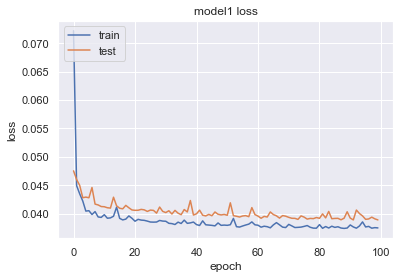

In [94]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

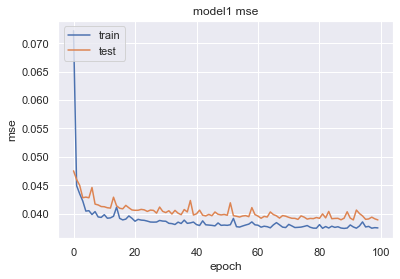

In [95]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

# Problem 2

# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda

In [97]:
forestfires = pd.read_csv("forestfires.csv")
forestfires.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [98]:
forestfires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [99]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# Dummy variables are already created so we will remove month and day columns :
forestfires.drop(["month","day"], axis=1, inplace=True)

<AxesSubplot:>

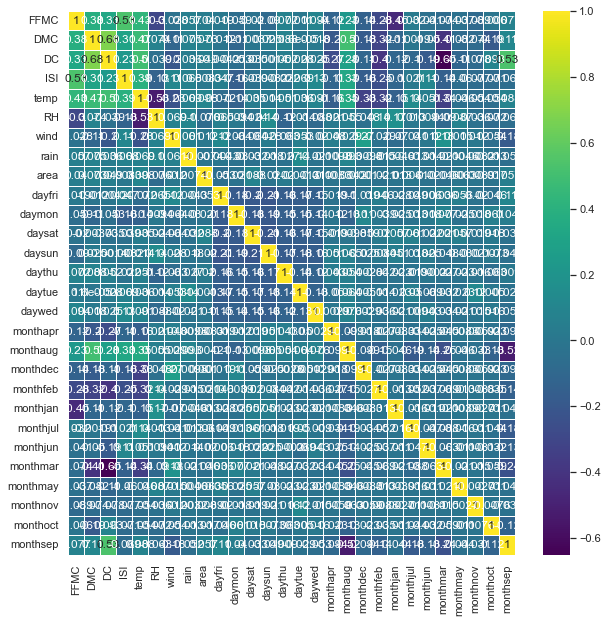

In [101]:
plt.figure(figsize=(10, 10))
sns.heatmap(forestfires.corr(),annot=True,cmap='viridis',linewidths=.5)

In [102]:
# Finding Categorical Data :
print("The FFMC column")
print(forestfires['FFMC'].value_counts())
print()
print("The DMC column")
print(forestfires['DMC'].value_counts())
print()
print("The DC column")
print(forestfires['DC'].value_counts())
print()
print("The ISI column")
print(forestfires['ISI'].value_counts())
print()
print("The TEMP column")
print(forestfires['temp'].value_counts())
print()
print("The RH column")
print(forestfires['RH'].value_counts())
print()
print("The WIND column")
print(forestfires['wind'].value_counts())
print()
print("The RAIN column")
print(forestfires['rain'].value_counts())
print()
print("The AREA column")
print(forestfires['area'].value_counts())
print()
print("The SIZE-CATEGORY column")
print(forestfires['size_category'].value_counts())
print()

The FFMC column
92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64

The DMC column
99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64

The DC column
745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64

The ISI column
9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64

The TEMP column
17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
       ..
16.3    1
12.8    1
10.4    1
8.7     1
25.6    1
Name: temp, Length: 192, dtype: int64

The RH column
27    33
39    24
35    20
43    17
42    17
      ..
96     1
97     1
99     1
18     1
69     1
Name

In [103]:
size_category_map = {"small":0, "large":1}
forestfires["size_category"] = forestfires["size_category"].map(size_category_map)
forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [104]:
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [105]:
forestfires.shape

(517, 29)

In [106]:
# Defining Predictors and Target Variables :
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

In [107]:
# Splitting data into Train and Test Data Set :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.3,stratify=target)

In [108]:
# Model Building :
def prep_model(hidden_dim):
    model = Sequential()
    
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else :
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

    return model

In [109]:
first_model = prep_model([28,50,40,20,1])
history = first_model.fit(np.array(x_train),np.array(y_train),epochs=500)

Epoch 1/500
12/12 [==============================] - 1s 4ms/step - loss: 0.6549 - accuracy: 0.7452
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4994 - accuracy: 0.7562
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4771 - accuracy: 0.8006
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 0.4633 - accuracy: 0.7978
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4087 - accuracy: 0.8338
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4160 - accuracy: 0.8421
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.8006
Epoch 8/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4009 - accuracy: 0.8421
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.7756
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3549 - accuracy: 0.8698
Epoch 11/

12/12 [==============================] - 0s 4ms/step - loss: 0.1855 - accuracy: 0.9501
Epoch 84/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9834
Epoch 85/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9917
Epoch 86/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1577 - accuracy: 0.9474
Epoch 87/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9861
Epoch 88/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0653 - accuracy: 0.9723
Epoch 89/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.9584
Epoch 90/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.9557
Epoch 91/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9723
Epoch 92/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9778
Epoch 93/500


12/12 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9640
Epoch 246/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9612
Epoch 247/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9945
Epoch 248/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9834
Epoch 249/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9751
Epoch 250/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9778
Epoch 251/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9861
Epoch 252/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9695
Epoch 253/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9806
Epoch 254/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9806
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9861
Epoch 408/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9945
Epoch 409/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9834
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9972
Epoch 411/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9889
Epoch 412/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 413/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9834
Epoch 414/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9889
Epoch 415/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9972
Epoch 416/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9889
Epoc

In [110]:
pred_train = first_model.predict(np.array(x_train))
pred_train = pd.Series([i[0] for i in pred_train])
pred_train

12/12 [==============================] - 0s 2ms/step


0      3.414562e-17
1      1.064328e-15
2      1.936940e-09
3      9.867654e-20
4      1.000000e+00
           ...     
356    3.252062e-18
357    1.000000e+00
358    1.000000e+00
359    8.976484e-12
360    1.302780e-14
Length: 361, dtype: float32

In [111]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"
pred_train_class

0      small
1      small
2      small
3      small
4      large
       ...  
356    small
357    large
358    large
359    small
360    small
Length: 361, dtype: object

In [112]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

0    264
1     97
Name: size_category, dtype: int64

In [113]:
#For training data
from sklearn.metrics import confusion_matrix

train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()

confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True))
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,96,0
small,1,264


In [114]:
#For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"

test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"
test["original_class"].value_counts()

np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True))
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

5/5 [==============================] - 0s 0s/step


original_class,large,small
row_0,,
large,39,0
small,3,114


In [115]:
# evaluate the model
scores = first_model.evaluate(predictors, target)
print("%s: %.2f%%" % (first_model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9923
accuracy: 99.23%


In [116]:
# list all data in history
first_model.history.history.keys()

dict_keys([])

KeyError: 'val_accuracy'

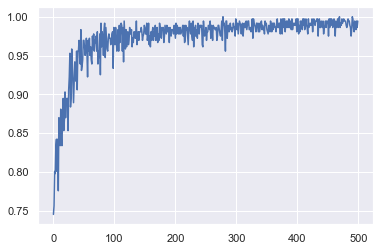

In [117]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

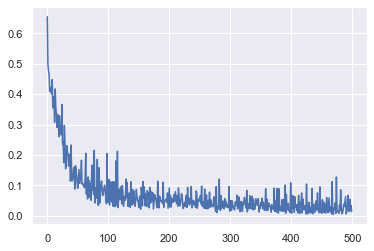

In [118]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()